In [1]:
pip install dcor --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch==2.2.0 --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
import math
import os
import pandas as pd
import torch
import time as time
from omegaconf import OmegaConf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Read pickles from the path specified in config.dest_file
config_path = "config.yaml"  # Replace with the path to your config file
config = OmegaConf.load(config_path)
df_encoded_path = os.path.join(config.dest_file, "df_encoded.csv")
# Load the DataFrame from the CSV file
df = pd.read_csv(df_encoded_path)

In [7]:
df.head()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
0,3.0,1.0,40000.0,40000.0,1500.0,40.0,65.0,0.20,6.6725,0.0,0.5,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,56093.360588,0.000005,0.000885,0.000019,0.001452,0.000023,0.001471,0.000599,0.002724,0.004244,0.000916,0.000017,0.001938,1.483623e-07,0.000036,0.001938,0.000961
1,3.0,1.0,40000.0,25000.0,3000.0,70.0,50.0,0.15,6.6725,0.0,0.5,16.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,43493.360588,0.000004,0.000805,0.000018,0.001366,0.000022,0.001384,0.000567,0.002586,0.004010,0.000853,0.000016,0.001825,1.379114e-07,0.000032,0.001825,0.000874
2,3.0,0.0,40000.0,40000.0,4500.0,100.0,65.0,0.20,6.6725,0.0,0.3,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,102993.360588,0.000005,0.000885,0.000019,0.001452,0.000023,0.001470,0.000599,0.002723,0.004243,0.000916,0.000017,0.001938,1.483223e-07,0.000036,0.001938,0.000960
3,3.0,1.0,10000.0,25000.0,4500.0,70.0,50.0,0.18,6.6725,0.0,0.5,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,44993.360588,0.000004,0.000853,0.000018,0.001414,0.000022,0.001432,0.000584,0.002666,0.004146,0.000891,0.000017,0.001891,1.439857e-07,0.000034,0.001891,0.000926
4,3.0,0.0,25000.0,25000.0,3000.0,40.0,65.0,0.18,6.6725,0.0,0.3,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,67593.360588,0.000004,0.000852,0.000018,0.001414,0.000022,0.001432,0.000584,0.002666,0.004145,0.000890,0.000017,0.001890,1.439457e-07,0.000034,0.001890,0.000925


In [8]:
df.describe()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
count,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,1.641480e+05,164148.000000,164148.000000,164148.000000,1.641480e+05,1.641480e+05,164148.0,164148.0,164148.0,164148.0,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.00000,164148.000000,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.0,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,1.641480e+05,164148.000000,164148.000000,164148.000000
mean,3.000000,0.195409,15862.270634,36722.073982,1606.586739,51.724541,50.532934,0.163086,6.672500e+00,0.769793,0.308290,2.740917,5.495000e-03,6.677995e+00,100.0,5.0,25.0,40.0,30.0,1133.808514,4000.0,3.455528,2.275922,0.461194,19.336300,1.319736,9.781782,0.319078,1.0,5381.814874,0.001102,0.147477,0.174690,360.0,14.347540,10185.344933,21.585642,3.501060,2.076979,0.0,0.426347,1.0,5.818901,9.061274,5.43275,4.115469,1.0,41.896764,30.0,6594.545654,3.644126,2000.0,38500.0,66584.271435,0.000040,0.003328,0.000024,0.030269,0.000185,0.030294,0.006191,0.014077,0.023236,0.002927,0.000106,0.019277,1.373095e-06,0.000173,0.019277,0.003792
std,0.554905,0.396516,10592.036270,12479.432960,505.081843,21.184073,2.776695,0.024592,7.269763e-12,1.186966,0.037572,6.279052,3.367976e-15,1.328275e-11,0.0,0.0,0.0,0.0,0.0,2229.091505,0.0,1.700838,2.623105,0.498493,29.477817,0.732969,9.831097,0.466121,0.0,15494.806796,0.000140,0.681254,0.768119,0.0,11.216855,6239.503454,11.208630,1.647026,0.525674,0.0,1.047509,0.0,1.404725,4.282591,3.29176,0.933774,0.0,38.959314,0.0,16912.852510,4.686030,0.0,0.0,15482.078690,0.000101,0.005769,0.000017,0.080793,0.000451,0.080809,0.015016,0.031402,0.051850,0.005354,0.000233,0.048485,3.047302e-06,0.000378,0.048485,0.006825
min,2.000000,0.000000,10000.000000,25000.000000,1500.000000,40.000000,50.000000,0.150000,6.672500e+00,0.000000,0.300000,1.000000,5.495000e-03,6.677995e+00,100.0,5.0,25.0,40.0,30.0,50.000000,4000.0,0.000000,1.000000,0.000000,5.000000,1.000000,5.000000,0.000000,1.0,1.000000,0.000920,0.000000,0.000000,360.0,10.000000,8000.000000,12.000000,0.000000,1.000000,0.0,0.000000,1.0,2.000000,2.000000,0.00

In [17]:
df_encoded = df

In [6]:
import dcor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Function to compute distance correlation for a pair of columns
def compute_distance_correlation(col1, col2):
    return dcor.distance_correlation(col1, col2)

# Function to calculate distance correlation matrix using parallel processing
def distance_correlation_matrix_parallel(df, n_jobs=-1):
    num_vars = df.shape[1]
    corr_matrix = np.zeros((num_vars, num_vars))
    
    results = Parallel(n_jobs=n_jobs)(
        delayed(compute_distance_correlation)(df.iloc[:, i].values, df.iloc[:, j].values)
        for i in range(num_vars) for j in range(num_vars)
    )
    
    # Fill the correlation matrix
    for idx, (i, j) in enumerate([(i, j) for i in range(num_vars) for j in range(num_vars)]):
        corr_matrix[i, j] = results[idx]
    
    return corr_matrix

# Function to filter variables by distance correlation threshold
def filter_variables_by_distance_correlation_parallel(df, threshold=0.43, n_jobs=-1):
    corr_matrix = distance_correlation_matrix_parallel(df, n_jobs=n_jobs)
    filtered_corr_matrix = np.where(corr_matrix >= threshold, corr_matrix, 0)
    filtered_corr_df = pd.DataFrame(filtered_corr_matrix, index=df.columns, columns=df.columns)
    return filtered_corr_df


In [ ]:
#filtered_corr_df = filter_variables_by_distance_correlation_parallel(df_encoded, threshold=0.43, n_jobs=-1)

In [ ]:
#filtered_corr_df.to_csv(os.path.join(config.dest_file, "filtered_corr_df.csv"), index=True)

In [13]:
feature_column = ['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalTransportationPercentage',
       'percentageAircraft', 'percentageLorry', 'percentageTrain',
       'percentageShip', 'totalDistance', 'transportCost',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
       'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
       'machineCycleTime', 'maintenanceCost', 'productionCost',
       'injectedMaterial_materozza', 'injectionMouldingProcess',
       'memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
       'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter',
       'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod',
       'mouldDesignCostDisplay', 'mouldTotalCost']

target_column = ['Cost',
       'human health - photochemical oxidation',
       'ecosystem quality - terrestrial ecotoxicity',
       'resources - mineral extraction', 'resources - non-renewable energy',
       'ecosystem quality - terrestrial acidification & nutrification',
       'resources - total', 'human health - ionising radiation',
       'human health - respiratory effects (inorganics)',
       'human health - total', 'human health - human toxicity',
       'ecosystem quality - aquatic ecotoxicity',
       'climate change - climate change',
       'human health - ozone layer depletion',
       'ecosystem quality - land occupation', 'climate change - total',
       'ecosystem quality - total']

From the above table, we know hat most of the target variables having distance correlation=1 are redundant or used for deriving the final variables. Hence it is good to eliminate them and keep only four ['human health - total', 'ecosystem quality - total', 'resources - total', 'Cost']

In [14]:
input_variables= ['surfaceProcessingLocationCavity', 'hotRunner',
'hotRunnerCost','manufacturingCost', 'mouldValidationCost',
'designTime','hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
'weightCavityProcessed', 'weightMould',
'totalTransportationPercentage','percentageAircraft', 'percentageLorry', 'percentageTrain','percentageShip', 'totalDistance',
'injectedMaterial_product', 'injectedMaterialCost','percentageRecycledMaterial', 'maxDepth', 'maxWallThickness','productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
 'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
'machineCycleTime',
'maintenanceCost', 'productionCost','transportCost', 'mouldTotalCost',
'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter', 'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod','mouldDesignCostDisplay']

output_variables= ['human health - total', 
                   'ecosystem quality - total',
                    'resources - total', 
                      'Cost']

In [7]:
#import class bo from Parallel_Algos.py
from Parallel_Algos import BO
from sklearn.gaussian_process.kernels import RBF


Variable Partitioned BO run...
x shape: (4, 39), lwr shape: (4, 39), upr shape: (4, 39)
splits: 4, div: 9
Init 1/1, Time: 108.99s
Iter 1/29, Best error: 0.0043
Iter 2/29, Best error: 0.0042
Iter 3/29, Best error: 0.0000
Iter 4/29, Best error: 0.0000
Iter 5/29, Best error: 0.0000
Iter 6/29, Best error: 0.0000
Iter 7/29, Best error: 0.0001
Iter 8/29, Best error: 0.0000
Iter 9/29, Best error: 0.0000
Iter 10/29, Best error: 0.0000
Iter 11/29, Best error: 0.0000
Iter 12/29, Best error: 0.0042
Iter 13/29, Best error: 0.0042
Iter 14/29, Best error: 0.0042
Iter 15/29, Best error: 0.0042
Iter 16/29, Best error: 0.0042
Iter 17/29, Best error: 0.0042
Iter 18/29, Best error: 0.0042
Iter 19/29, Best error: 0.0043
Iter 20/29, Best error: 0.0042
Iter 21/29, Best error: 0.0043
Iter 22/29, Best error: 0.0043
Iter 23/29, Best error: 0.0043
Iter 24/29, Best error: 0.0043
Iter 25/29, Best error: 0.0042
Iter 26/29, Best error: 0.0001
Iter 27/29, Best error: 0.0000
Iter 28/29, Best error: 0.0001
Iter 29/29,

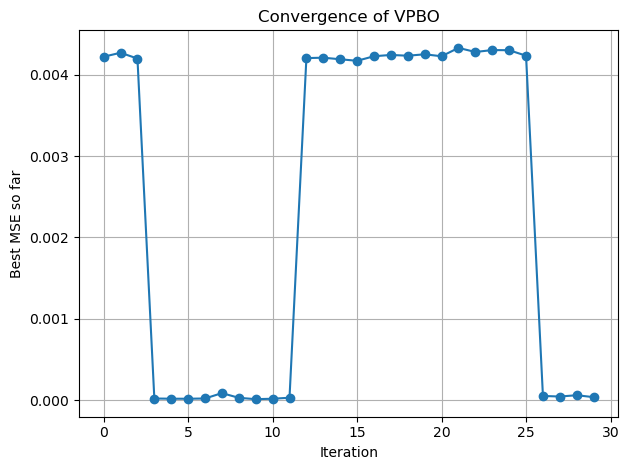

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process.kernels import RBF
from scipy.optimize import Bounds
import dcor
from joblib import Parallel, delayed
import time
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# 1. Load your dataframe
df = pd.read_csv(df_encoded_path) # <- replace with actual path
np.random.seed(42)

# 2. Select features and target

selected_features = [
    'surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
    'manufacturingCost', 'mouldValidationCost', 'designTime',
    'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
    'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
    'weightCavityProcessed', 'weightMould', 'totalDistance',
    'injectedMaterial_product', 'injectedMaterialCost',
    'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
    'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
    'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
    'productionCost', 'injectedMaterial_materozza',
    'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
    'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
    'deliveryVolume', 'deliveryPeriod'
]

target_column = ['Cost', 'resources - total', 'human health - total', 'ecosystem quality - total']


# 3. Split the data into features and target and scale them

X_raw = df[selected_features].values
Y_raw = df[target_column].values

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_raw)

scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(Y_raw)


# Distance correlation filter
def dcor_filter(X, y, threshold):
    selected = []
    for i in range(X.shape[1]):
        corr = np.mean([dcor.distance_correlation(X[:, i], y[:, j]) for j in range(y.shape[1])])
        if corr >= threshold:
            selected.append(i)
    return X[:, selected], selected



# MLP evaluator for multiple targets
def mlp_eval(x_batch, *args):
    X_full, y_full = args
    results = []
    for x in x_batch:
        threshold = x[0]
        hidden_size = int(x[1] * (200 - 10) + 10)
        X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2)

        X_sel, selected = dcor_filter(X_train, y_train, threshold)
        if X_sel.shape[1] == 0:
            results.append([1e6])
            continue

        X_val_sel = X_val[:, selected]
        model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=300, random_state=0)
        model.fit(X_sel, y_train)
        y_pred = model.predict(X_val_sel)
        error = mean_squared_error(y_val, y_pred)
        print(f"[Eval] Threshold: {threshold:.3f}, Hidden: {hidden_size}, Features: {len(selected)}, MSE: {error:.4f}")

        results.append([error])
    return results

# Reference model
def ref_model(x_batch, *args):
    return np.zeros((x_batch.shape[0], 1))

# BO class
class BO:
    def __init__(self, distmod, args, dist_ref, ref_args, dim, bounds,
                 descale, kernel, exp_w, ub, lb, system='default'):
        self.distmod = distmod
        self.args = args
        self.dist_ref = dist_ref
        self.ref_args = ref_args
        self.dim = dim
        self.bounds = bounds
        self.descale = descale
        self.kernel = kernel
        self.exp_w = exp_w
        self.ub = ub
        self.lb = lb
        self.system = system

    def optimizer_vpbo(self, trials, split_num, lim_init,
                       f_cores=1, af_cores=1, ref_cores=1, x_init=None):
        print('Variable Partitioned BO run...')
        start = time.time()
        self.trials_vp = trials
        splits = split_num
        self.time_vp = np.zeros(self.trials_vp)
        self.time_fvp = np.zeros(self.trials_vp)
        div = int(self.dim / splits)
        ref_mod = self.dist_ref['distrefmod']

        x = lim_init * np.ones((splits, self.dim))
        lwr = x.copy()
        upr = x.copy() + 1e-6
        print(f"x shape: {x.shape}, lwr shape: {lwr.shape}, upr shape: {upr.shape}")
        print(f"splits: {splits}, div: {div}")
        for i in range(splits):
            if x_init is None:
                x[i, i * div:(i + 1) * div] = np.random.uniform(self.bounds.lb,
                                                                self.bounds.ub,
                                                                (1, div))
            else:
                x_init = x_init.reshape(1, self.dim)
                x[i, i * div:(i + 1) * div] = x_init[0, i * div:(i + 1) * div]
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
        x = np.vstack([x, lim_init])

        init_pts = int(len(x) / splits)
        splt = int(x.shape[0] / f_cores)
        x_bs = np.array(np.ones(f_cores), dtype=object)

        for i in range(f_cores - 1):
            x_bs[i] = x[i * splt:(i + 1) * splt, :]
        x_bs[-1] = x[(f_cores - 1) * splt:, :]

        start_f = time.time()
        y = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_bs)
        y = np.vstack(y[:])
        y_ref = np.zeros_like(y)
        eps = y - y_ref
        y_bst = np.min(y, axis=0).reshape(-1, 1).T

        model_vp = {}
        bnds_var = {}
        for i in range(splits):
            model_vp[str(i + 1)] = GaussianProcessRegressor(self.kernel,
                                                            alpha=1e-6,
                                                            n_restarts_optimizer=10,
                                                            normalize_y=True)
            model_vp[str(i + 1)].fit(x, eps[:, 0])

            lwr[i] = x[np.argmin(y[:, 0])]
            upr[i] = x[np.argmin(y[:, 0])] + 1e-6
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
            bnds_var[str(i + 1)] = Bounds(lwr[i], upr[i])

        x_nxt = x.copy()
        x_nxtbs = np.array(np.ones(f_cores), dtype=object)

        for i in range(init_pts):
            end = time.time()
            self.time_vp[i] = (i + 1) * (end - start) / init_pts
            self.time_fvp[i] = (i + 1) * (end - start_f) / init_pts
            print(f'Init {i+1}/{init_pts}, Time: {self.time_vp[i]:.2f}s')

        for i in range(trials - init_pts):
            x0 = np.random.uniform(self.bounds.lb, self.bounds.ub, (16, self.dim))
            x_nxt[i % splits] = x0[np.random.randint(len(x0))]

            for j in range(f_cores - 1):
                x_nxtbs[j] = x_nxt[j * splt:(j + 1) * splt, :]
            x_nxtbs[-1] = x_nxt[(f_cores - 1) * splt:, :]

            start_f = time.time()
            y_nxt = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_nxtbs)
            y_nxt = np.vstack(y_nxt[:])
            y_ref_nxt = np.zeros_like(y_nxt)
            eps_nxt = y_nxt - y_ref_nxt

            x = np.vstack([x, x_nxt])
            y = np.vstack([y, y_nxt])
            eps = np.vstack([eps, eps_nxt])
            y_bst = np.vstack([y_bst, np.min(y_nxt, axis=0).reshape(-1, 1).T])

            for j in range(splits):
                model_vp[str(j + 1)].fit(x, eps[:, 0])
                bnds_var[str(j + 1)] = Bounds(lwr[j], upr[j])

            self.time_vp[i + init_pts] = time.time() - start
            self.time_fvp[i + init_pts] = time.time() - start_f
            print(f'Iter {i+1}/{trials-init_pts}, Best error: {y_bst[-1,0]:.4f}')

        self.vpbo_optim = True
        self.model_vp = model_vp
        self.x_vp = self.descale(x)
        self.y_vp = y
        self.y_vpbst = y_bst


# Run
bo = BO(
    distmod=mlp_eval,
    args=(X_scaled, Y_scaled),  # MULTI-TARGET support
    dist_ref={'distrefmod': ref_model},
    ref_args=(),
    dim=X_scaled.shape[1],
    bounds=Bounds(np.zeros(X_scaled.shape[1]), np.ones(X_scaled.shape[1])),
    descale=lambda x: x,
    kernel=1.0 * RBF(length_scale=1.0),
    exp_w=0.1,
    ub=np.ones(X_scaled.shape[1]),
    lb=np.zeros(X_scaled.shape[1]),
    system='mlp_opt'
)

lim_init = np.random.uniform(0, 1, bo.dim)
x_init = np.random.uniform(0, 1, bo.dim)
start_time = time.time()
bo.optimizer_vpbo(
    trials=30,
    split_num=4,
    lim_init=lim_init,
    f_cores=4,  # PARALLEL CPU
    af_cores=2,
    ref_cores=2,
    x_init=x_init
)
end_time = time.time()
# Best result
best_idx = np.argmin(bo.y_vp)
best_input = bo.x_vp[best_idx]
best_error = bo.y_vp[best_idx]

threshold_best = best_input[0]
hidden_size_best = int(best_input[1] * (200 - 10) + 10)

print("\n🎯 Best Hyperparameters Found:")
print(f"Distance Threshold: {threshold_best:.3f}")
print(f"Hidden Layer Size: {hidden_size_best}")
print(f"Validation MSE: {best_error[0]:.4f}")
print(f"Total time taken for optimization: {end_time - start_time:.2f} seconds")

# 🔍 Visualize convergence
plt.plot(bo.y_vpbst[:, 0], marker='o')
plt.xlabel("Iteration")
plt.ylabel("Best MSE so far")
plt.title("Convergence of VPBO")
plt.grid(True)
plt.tight_layout()
plt.show()


# Save results
results = {
    "best_input": best_input.tolist(),
    "best_error": best_error.tolist(),
    "y_vpbst": bo.y_vpbst.tolist(),
    "x_vp": bo.x_vp.tolist()
}

results_path = os.path.join(config.dest_file, "bo_results.json")
with open(results_path, 'w') as f:
    json.dump(results, f, indent=4)

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process.kernels import RBF
from scipy.optimize import Bounds
import dcor
from joblib import Parallel, delayed
import time
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# 1. Load your dataframe
df = pd.read_csv(df_encoded_path) # <- replace with actual path
np.random.seed(42)

# 2. Select features and target

selected_features = [
    'surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
    'manufacturingCost', 'mouldValidationCost', 'designTime',
    'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
    'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
    'weightCavityProcessed', 'weightMould', 'totalDistance',
    'injectedMaterial_product', 'injectedMaterialCost',
    'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
    'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
    'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
    'productionCost', 'injectedMaterial_materozza',
    'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
    'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
    'deliveryVolume', 'deliveryPeriod'
]

target_column = ['Cost', 'resources - total', 'human health - total', 'ecosystem quality - total']


# 3. Split the data into features and target and scale them

X_raw = df[selected_features].values
Y_raw = df[target_column].values

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_raw)

scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(Y_raw)


# Distance correlation filter
def dcor_filter(X, y, threshold):
    selected = []
    for i in range(X.shape[1]):
        corr = np.mean([dcor.distance_correlation(X[:, i], y[:, j]) for j in range(y.shape[1])])
        if corr >= threshold:
            selected.append(i)
    return X[:, selected], selected




# MLP evaluator for multiple targets with threshold maximization + error minimization
def mlp_eval(x_batch, *args):
    X_full, y_full = args
    results = []

    # weights for scalarization
    alpha = 0.5  # weight for threshold reward
    beta = 0.5   # weight for error penalty

    for x in x_batch:
        threshold = x[0]
        hidden_size = int(x[1] * (200 - 10) + 10)

        X_train, X_val, y_train, y_val = train_test_split(
            X_full, y_full, test_size=0.2
        )

        X_sel, selected = dcor_filter(X_train, y_train, threshold)
        if X_sel.shape[1] == 0:
            # no features selected → very bad score
            results.append([1e6])
            continue

        X_val_sel = X_val[:, selected]
        model = MLPRegressor(
            hidden_layer_sizes=(hidden_size,), max_iter=300, random_state=0
        )
        model.fit(X_sel, y_train)
        y_pred = model.predict(X_val_sel)

        error = mean_squared_error(y_val, y_pred)

        # scalarized objective: lower is better
        score = beta * error - alpha * threshold

        print(f"[Eval] Threshold: {threshold:.3f}, Hidden: {hidden_size}, "
              f"Features: {len(selected)}, MSE: {error:.4f}, Score: {score:.4f}")

        results.append([score])

    return results

# Reference model
def ref_model(x_batch, *args):
    return np.zeros((x_batch.shape[0], 1))

# BO class
class BO:
    def __init__(self, distmod, args, dist_ref, ref_args, dim, bounds,
                 descale, kernel, exp_w, ub, lb, system='default'):
        self.distmod = distmod
        self.args = args
        self.dist_ref = dist_ref
        self.ref_args = ref_args
        self.dim = dim
        self.bounds = bounds
        self.descale = descale
        self.kernel = kernel
        self.exp_w = exp_w
        self.ub = ub
        self.lb = lb
        self.system = system

    def optimizer_vpbo(self, trials, split_num, lim_init,
                       f_cores=1, af_cores=1, ref_cores=1, x_init=None):
        print('Variable Partitioned BO run...')
        start = time.time()
        self.trials_vp = trials
        splits = split_num
        self.time_vp = np.zeros(self.trials_vp)
        self.time_fvp = np.zeros(self.trials_vp)
        div = int(self.dim / splits)
        ref_mod = self.dist_ref['distrefmod']

        x = lim_init * np.ones((splits, self.dim))
        lwr = x.copy()
        upr = x.copy() + 1e-6
        print(f"x shape: {x.shape}, lwr shape: {lwr.shape}, upr shape: {upr.shape}")
        print(f"splits: {splits}, div: {div}")
        for i in range(splits):
            if x_init is None:
                x[i, i * div:(i + 1) * div] = np.random.uniform(self.bounds.lb,
                                                                self.bounds.ub,
                                                                (1, div))
            else:
                x_init = x_init.reshape(1, self.dim)
                x[i, i * div:(i + 1) * div] = x_init[0, i * div:(i + 1) * div]
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
        x = np.vstack([x, lim_init])

        init_pts = int(len(x) / splits)
        splt = int(x.shape[0] / f_cores)
        x_bs = np.array(np.ones(f_cores), dtype=object)

        for i in range(f_cores - 1):
            x_bs[i] = x[i * splt:(i + 1) * splt, :]
        x_bs[-1] = x[(f_cores - 1) * splt:, :]

        start_f = time.time()
        y = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_bs)
        y = np.vstack(y[:])
        y_ref = np.zeros_like(y)
        eps = y - y_ref
        y_bst = np.min(y, axis=0).reshape(-1, 1).T

        model_vp = {}
        bnds_var = {}
        for i in range(splits):
            model_vp[str(i + 1)] = GaussianProcessRegressor(self.kernel,
                                                            alpha=1e-6,
                                                            n_restarts_optimizer=10,
                                                            normalize_y=True)
            model_vp[str(i + 1)].fit(x, eps[:, 0])

            lwr[i] = x[np.argmin(y[:, 0])]
            upr[i] = x[np.argmin(y[:, 0])] + 1e-6
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
            bnds_var[str(i + 1)] = Bounds(lwr[i], upr[i])

        x_nxt = x.copy()
        x_nxtbs = np.array(np.ones(f_cores), dtype=object)

        for i in range(init_pts):
            end = time.time()
            self.time_vp[i] = (i + 1) * (end - start) / init_pts
            self.time_fvp[i] = (i + 1) * (end - start_f) / init_pts
            print(f'Init {i+1}/{init_pts}, Time: {self.time_vp[i]:.2f}s')

        for i in range(trials - init_pts):
            x0 = np.random.uniform(self.bounds.lb, self.bounds.ub, (16, self.dim))
            x_nxt[i % splits] = x0[np.random.randint(len(x0))]

            for j in range(f_cores - 1):
                x_nxtbs[j] = x_nxt[j * splt:(j + 1) * splt, :]
            x_nxtbs[-1] = x_nxt[(f_cores - 1) * splt:, :]

            start_f = time.time()
            y_nxt = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_nxtbs)
            y_nxt = np.vstack(y_nxt[:])
            y_ref_nxt = np.zeros_like(y_nxt)
            eps_nxt = y_nxt - y_ref_nxt

            x = np.vstack([x, x_nxt])
            y = np.vstack([y, y_nxt])
            eps = np.vstack([eps, eps_nxt])
            y_bst = np.vstack([y_bst, np.min(y_nxt, axis=0).reshape(-1, 1).T])

            for j in range(splits):
                model_vp[str(j + 1)].fit(x, eps[:, 0])
                bnds_var[str(j + 1)] = Bounds(lwr[j], upr[j])

            self.time_vp[i + init_pts] = time.time() - start
            self.time_fvp[i + init_pts] = time.time() - start_f
            print(f'Iter {i+1}/{trials-init_pts}, Best error: {y_bst[-1,0]:.4f}')

        self.vpbo_optim = True
        self.model_vp = model_vp
        self.x_vp = self.descale(x)
        self.y_vp = y
        self.y_vpbst = y_bst

    def optimizer_sbo(self, trials, af_cores = 1, x_init = None, init_pts = 1):
        print('Vanilla BO run...')
        start = time.time()
        self.trials_sbo = trials
        self.time_sbo = np.ones(self.trials_sbo)
        self.time_fsbo = np.ones(self.trials_sbo)
        
        if x_init is None:
            x = np.random.uniform(self.bounds.lb,
                                  self.bounds.ub,
                                  (init_pts, self.dim))
        else:
            x = x_init.reshape(-1, self.dim)
            init_pts = len(x)
        
        start_f = time.time()
        y = self.system(self.descale(x), *self.args).reshape(-1, 1)
        end_f = time.time()
        
        model_sbo = gpr.GaussianProcessRegressor(self.kernel,
                                               alpha = 1e-6,
                                               normalize_y = True,
                                               n_restarts_optimizer = 20)
        model_sbo.fit(x, y)
        LCBgp = LCB_AF(model_sbo, self.dim, self.exp_w, self.descale).LCB
        
        end = time.time()
        for i in range(init_pts):
            self.time_sbo[i] = (i+1)*(end-start)/init_pts
            self.time_fsbo[i] = (i+1)*(end_f-start_f)/init_pts
        
        print('ITERATION COUNT IS AT 'f'{init_pts};\
              TOTAL ELAPSED TIME: 'f'{self.time_sbo[init_pts-1]:.1f}')
              
        for i in range(self.trials_sbo-init_pts):
            x0 = np.random.uniform(self.bounds.lb,
                                   self.bounds.ub,
                                   (128, self.dim))
            opt = Parallel(n_jobs = af_cores)(delayed(minimize)(LCBgp,
                                                                x_0,
                                                                method = 'L-BFGS-B',
                                                                bounds = self.bounds)
                                              for x_0 in x0)
            x_nxts = np.array([res.x for res in opt], dtype  = 'float')
            funs = np.array([np.atleast_1d(res.fun)[0] for res in opt])
            x_nxt = x_nxts[np.argmin(funs)].reshape(1, self.dim)
            
            start_f = time.time()
            y_nxt = self.system(self.descale(x_nxt), *self.args).reshape(-1, 1)
            end_f = time.time()
            self.time_fsbo[i+init_pts] = self.time_fsbo[i+init_pts-1]+(end_f-start_f)
            
            x = np.vstack([x, x_nxt])
            y = np.vstack([y, y_nxt])
            model_sbo.fit(x, y)

            end = time.time()
            self.time_sbo[i+init_pts] = end-start
            
            print('ITERATION COUNT IS AT 'f'{init_pts+i+1};\
                  TOTAL ELAPSED TIME: 'f'{self.time_sbo[i+init_pts]:.1f}')
                  
        self.model_sbo = model_sbo
        self.x_sbo = self.descale(x)
        self.y_sbo = y


# Run
bo = BO(
    distmod=mlp_eval,
    args=(X_scaled, Y_scaled),  # MULTI-TARGET support
    dist_ref={'distrefmod': ref_model},
    ref_args=(),
    dim=X_scaled.shape[1],
    bounds=Bounds(np.zeros(X_scaled.shape[1]), np.ones(X_scaled.shape[1])),
    descale=lambda x: x,
    kernel=1.0 * RBF(length_scale=1.0),
    exp_w=0.1,
    ub=np.ones(X_scaled.shape[1]),
    lb=np.zeros(X_scaled.shape[1]),
    system='mlp_opt'
)


In [ ]:

lim_init = np.random.uniform(0, 1, bo.dim)
x_init = np.random.uniform(0, 1, bo.dim)
start_time = time.time()
bo.optimizer_vpbo(
    trials=4,
    split_num=6,
    lim_init=lim_init,
    f_cores=6,  # PARALLEL CPU
    af_cores=2,
    ref_cores=2,
    x_init=x_init
)
end_time = time.time()
# Best result
best_idx = np.argmin(bo.y_vp)
best_input = bo.x_vp[best_idx]
best_error = bo.y_vp[best_idx]

threshold_best = best_input[0]
hidden_size_best = int(best_input[1] * (200 - 10) + 10)

print("\n🎯 Best Hyperparameters Found:")
print(f"Distance Threshold: {threshold_best:.3f}")
print(f"Hidden Layer Size: {hidden_size_best}")
print(f"Validation MSE: {best_error[0]:.4f}")
print(f"Total time taken for optimization: {end_time - start_time:.2f} seconds")

# 🔍 Visualize convergence
plt.plot(bo.y_vpbst[:, 0], marker='o')
plt.xlabel("Iteration")
plt.ylabel("Best MSE so far")
plt.title("Convergence of VPBO")
plt.grid(True)
plt.tight_layout()
plt.show()


# Save results
results = {
    "best_input": best_input.tolist(),
    "best_error": best_error.tolist(),
    "y_vpbst": bo.y_vpbst.tolist(),
    "x_vp": bo.x_vp.tolist()
}

results_path = os.path.join(config.dest_file, "bo_results.json")
with open(results_path, 'w') as f:
    json.dump(results, f, indent=4)

Variable Partitioned BO run...
x shape: (6, 39), lwr shape: (6, 39), upr shape: (6, 39)
splits: 6, div: 6


KeyboardInterrupt: 

In [17]:
# ---- Serial BO ----
bo_serial = BO(
    distmod=mlp_eval,
    args=(X_scaled, Y_scaled),
    dist_ref={'distrefmod': ref_model},
    ref_args=(),
    dim=X_scaled.shape[1],
    bounds=Bounds(np.zeros(X_scaled.shape[1]), np.ones(X_scaled.shape[1])),
    descale=lambda x: x,
    kernel=1.0 * RBF(length_scale=1.0),
    exp_w=0.1,
    ub=np.ones(X_scaled.shape[1]),
    lb=np.zeros(X_scaled.shape[1]),
    system='mlp_opt'
)
start_sbo = time.time()
bo_serial.optimizer_sbo(trials=30, af_cores=4)
sbo_time = time.time() - start_sbo
sbo_best_mse = np.min(bo_serial.y_sbo)

Vanilla BO run...


TypeError: 'str' object is not callable

In [9]:
from itertools import product
import time

def run_gridsearch(X_scaled, Y_scaled, thresholds, hidden_sizes):
    best_score = float('inf')
    best_params = None
    start = time.time()
    eval_count = 0

    for th, hs in product(thresholds, hidden_sizes):
        X_sel, selected = dcor_filter(X_scaled, Y_scaled, th)
        if X_sel.shape[1] == 0:
            continue
        model = MLPRegressor(hidden_layer_sizes=(hs,), max_iter=300, random_state=0)
        X_train, X_val, y_train, y_val = train_test_split(X_sel, Y_scaled, test_size=0.2)
        model.fit(X_train, y_train)
        mse = mean_squared_error(y_val, model.predict(X_val))
        eval_count += 1

        if mse < best_score:
            best_score = mse
            best_params = (th, hs)

    elapsed = time.time() - start
    return best_score, elapsed, eval_count, best_params

grid_points = int(np.sqrt(30))  # ≈ same total evals
thresholds = np.linspace(0, 1, grid_points)
hidden_sizes_scaled = np.linspace(0, 1, grid_points)
hidden_sizes = (hidden_sizes_scaled * (200 - 10) + 10).astype(int)
gs_mse, gs_time, gs_evals, gs_params = run_gridsearch(X_scaled, Y_scaled, thresholds, hidden_sizes)
print(f"[GridSearch] Best MSE={gs_mse:.4f}, Time={gs_time:.2f}s, Evals={gs_evals}, Params={gs_params}")


[GridSearch] Best MSE=0.0000, Time=1311.81s, Evals=20, Params=(0.0, 105)


In [18]:
# Serial BO

bo_serial = BO(
    ub=np.ones(X_scaled.shape[1]),
    lb=np.zeros(X_scaled.shape[1]),
    dim=X_scaled.shape[1],
    exp_w=0.1,
    kernel=1.0 * RBF(length_scale=1.0),
    system=mlp_eval,
    bounds=Bounds(np.zeros(X_scaled.shape[1]), np.ones(X_scaled.shape[1])),
    args=(X_scaled, Y_scaled)
)
start_sbo = time.time()
bo_serial.optimizer_sbo(trials=30, af_cores=4)
sbo_time = time.time() - start_sbo
sbo_best_mse = np.min(bo_serial.y_sbo)
print(f"[Serial BO] Best MSE={sbo_best_mse:.4f}, Time={sbo_time:.2f}s, Evals={len(bo_serial.y_sbo)}")

# VPBO
bo_vp = BO(
    ub=np.ones(X_scaled.shape[1]),
    lb=np.zeros(X_scaled.shape[1]),
    dim=X_scaled.shape[1],
    exp_w=0.1,
    kernel=1.0 * RBF(length_scale=1.0),
    bounds=Bounds(np.zeros(X_scaled.shape[1]), np.ones(X_scaled.shape[1])),
    args=(X_scaled, Y_scaled),
    distmod=mlp_eval,
    distmod_args=(X_scaled, Y_scaled),
    dist_ref={'distrefmod': ref_model}
)
start_vp = time.time()
bo_vp.optimizer_vpbo(trials=30, split_num=4, lim_init=np.random.uniform(0,1,bo_vp.dim), f_cores=4)
vp_time = time.time() - start_vp
vp_best_mse = np.min(bo_vp.y_vp)
print(f"[VPBO] Best MSE={vp_best_mse:.4f}, Time={vp_time:.2f}s, Evals={len(bo_vp.y_vp)}")


TypeError: BO.__init__() missing 4 required positional arguments: 'distmod', 'dist_ref', 'ref_args', and 'descale'

In [19]:
import matplotlib.pyplot as plt

methods = ["GridSearch", "Serial BO", "VPBO"]
times = [gs_time, sbo_time, vp_time]
mses = [gs_mse, sbo_best_mse, vp_best_mse]
evals = [gs_evals, len(bo_serial.y_sbo), len(bo_vp.y_vp)]

fig, ax1 = plt.subplots()

ax1.bar(methods, times, color='skyblue')
ax1.set_ylabel('Time (s)', color='blue')
ax2 = ax1.twinx()
ax2.plot(methods, mses, marker='o', color='red')
ax2.set_ylabel('MSE', color='red')
plt.title('Accuracy vs Time')

plt.show()

# Optional: evaluations comparison
plt.bar(methods, evals, color='green')
plt.ylabel('# Function Evaluations')
plt.title('Cost Comparison')
plt.show()


NameError: name 'sbo_time' is not defined

In [20]:
import math
import matplotlib.pyplot as plt

# ---- GridSearch ----
def run_gridsearch_same_space(X_full, y_full, total_evals, hidden_min=10, hidden_max=200):
    """
    Grid search over same space as BO:
    - threshold ∈ [0,1]
    - hidden_size_scaled ∈ [0,1] (mapped to [hidden_min, hidden_max])
    total_evals ≈ VPBO trials
    """
    from itertools import product
    start = time.time()
    
    grid_points = int(math.sqrt(total_evals))
    thresholds = np.linspace(0, 1, grid_points)
    hidden_scaled = np.linspace(0, 1, grid_points)
    hidden_sizes = (hidden_scaled * (hidden_max - hidden_min) + hidden_min).astype(int)
    
    best_score = float('inf')
    best_params = None
    eval_count = 0
    
    for th, hs in product(thresholds, hidden_sizes):
        X_sel, selected = dcor_filter(X_full, y_full, th)
        if X_sel.shape[1] == 0:
            continue
        X_train, X_val, y_train, y_val = train_test_split(X_sel, y_full, test_size=0.2)
        model = MLPRegressor(hidden_layer_sizes=(hs,), max_iter=300, random_state=0)
        model.fit(X_train, y_train)
        mse = mean_squared_error(y_val, model.predict(X_val))
        eval_count += 1
        
        if mse < best_score:
            best_score = mse
            best_params = (th, hs)
    
    elapsed = time.time() - start
    return best_score, elapsed, eval_count, best_params

# ---- Serial BO ----
bo_serial = BO(
    distmod=mlp_eval,
    args=(X_scaled, Y_scaled),
    dist_ref={'distrefmod': ref_model},
    ref_args=(),
    dim=X_scaled.shape[1],
    bounds=Bounds(np.zeros(X_scaled.shape[1]), np.ones(X_scaled.shape[1])),
    descale=lambda x: x,
    kernel=1.0 * RBF(length_scale=1.0),
    exp_w=0.1,
    ub=np.ones(X_scaled.shape[1]),
    lb=np.zeros(X_scaled.shape[1]),
    system='mlp_opt'
)
start_sbo = time.time()
bo_serial.optimizer_sbo(trials=30, af_cores=4)
sbo_time = time.time() - start_sbo
sbo_best_mse = np.min(bo_serial.y_sbo)

# ---- VPBO ----
bo_vp = BO(
    distmod=mlp_eval,
    args=(X_scaled, Y_scaled),
    dist_ref={'distrefmod': ref_model},
    ref_args=(),
    dim=X_scaled.shape[1],
    bounds=Bounds(np.zeros(X_scaled.shape[1]), np.ones(X_scaled.shape[1])),
    descale=lambda x: x,
    kernel=1.0 * RBF(length_scale=1.0),
    exp_w=0.1,
    ub=np.ones(X_scaled.shape[1]),
    lb=np.zeros(X_scaled.shape[1]),
    system='mlp_opt'
)
lim_init = np.random.uniform(0, 1, bo_vp.dim)
x_init = np.random.uniform(0, 1, bo_vp.dim)
start_vp = time.time()
bo_vp.optimizer_vpbo(
    trials=30,
    split_num=4,
    lim_init=lim_init,
    f_cores=4,
    af_cores=2,
    ref_cores=2,
    x_init=x_init
)
vp_time = time.time() - start_vp
vp_best_mse = np.min(bo_vp.y_vp)

# ---- GridSearch Run ----
gs_mse, gs_time, gs_evals, gs_params = run_gridsearch_same_space(
    X_scaled, Y_scaled, total_evals=30
)

# ---- Print summary ----
print(f"[GridSearch] Best MSE={gs_mse:.4f}, Time={gs_time:.2f}s, Evals={gs_evals}, Params={gs_params}")
print(f"[Serial BO] Best MSE={sbo_best_mse:.4f}, Time={sbo_time:.2f}s, Evals={len(bo_serial.y_sbo)}")
print(f"[VPBO]      Best MSE={vp_best_mse:.4f}, Time={vp_time:.2f}s, Evals={len(bo_vp.y_vp)}")

# ---- Plots ----
methods = ["GridSearch", "Serial BO", "VPBO"]
times = [gs_time, sbo_time, vp_time]
mses = [gs_mse, sbo_best_mse, vp_best_mse]
evals = [gs_evals, len(bo_serial.y_sbo), len(bo_vp.y_vp)]

# Accuracy vs Time
fig, ax1 = plt.subplots()
ax1.bar(methods, times, color='skyblue')
ax1.set_ylabel('Time (s)', color='blue')
ax2 = ax1.twinx()
ax2.plot(methods, mses, marker='o', color='red')
ax2.set_ylabel('MSE', color='red')
plt.title('Accuracy vs Time')
plt.tight_layout()
plt.show()

# Cost comparison
plt.bar(methods, evals, color='green')
plt.ylabel('# Function Evaluations')
plt.title('Cost Comparison')
plt.tight_layout()
plt.show()


Vanilla BO run...


TypeError: 'str' object is not callable